# What factors affect the Satisfactoriness of surfboards?
**Data Science CSPB 3022** <br>
**Summer 2023**<br>
**Dylan Smith** 

### Project Topic, Description, Goals

The motivation for this project is that I recently started a wakesurf board company with my brother and two cousins. We want to bring engineering to the design of wakesurf boards, so I want to see if I can use data analysis and ML to discover what board attributes can be targeted for design to improve the ride of a board.

The idea behind this project is to use data from a survery of surfers to determine which attributes of the board and the rider determine how people measure the boards satisfactoriness. Surfboards can vary wildly in terms of size, weight, shape and volume. These different attributes thus affect how a board will move through the water and thus have a huge influence on how the 'ride' of the board will fell. For example, shorter boards tend to have less stability but more maneuverability, while larger boards are much more stabvle and buoyand and so, in general, are easier to ride. These different qualities interact with a riders size and ability to determine how well a board 'rides' which has a different meaning for each rider. Thus I wanted to see if anything about this relationship between board and rider can be gleaned from this data set. 

This project will have two parts. The first is to measure which subjective qualitites (performance metrics) are the most important for determining adequacy of a ride. The second part will then be to determine which attributes of the board contribute to those individual performance metrics.

Part one will be a binary classification problem because I will be trying to predict the adequacy of the board (categorical: suitable or unsuitable) across different variables of the board and rider such as length, shape, rocker, thickness, volume, rider height and weight. Board adaquecy falls into inadequate, suitable, more or less, and very suitable. This can be broken down into a binary classification as either suitable or unsuitable by collapsing the 'more or less' value into unsuitable and then collapsing 'very suitable' into suitable. This will give you only suitable and unsuitable which will allow for a binary classification. The goal of this project will be to determine which board attributes have the most influence on whether a board is adequate or not, by determining first which performance metrics shape board adequacy and then determining which board attributes influence those metrics. This will give us an idea of the best features to target for board design as well as an idea of what about those features are desireable or undesireable.


 



### Description of Data Set

Kaggle dataset: https://www.kaggle.com/datasets/loureiro85/surfing?resource=download

This dataset was gathered in 2018 during the doctorate research of Guilherme Loureiro in Florianopolis-SC Brazil, at Universidade Federal de Santa Catarina. The data was acquired through online forms answered by surfers and comes from a survery of surfers in Brazil where they were asked to describe their board in regards to shape and size, as well as things like their (the rider) height and weight, their experience, and then how the board was overall (board_adequacy). The problem here then will be to determine the board adequacy metric by analyzing the other features defined by the other columns in a dataframe curated to contain only the relevant features.

Rows correspond to surfers and columns to questions.

The dataset corresponds to the surfing system, composed of five groups of data:
1. Surfboard
2. Wave
3. Surfer
4. Manoeuvres
5. Performance


### Exploration of Data and Initial Analysis

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
# sns.set() sets the color map to have a light blue background
import seaborn as sns; sns.set()

# Packages for ML
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.neighbors as neighbors

from sklearn import preprocessing 
# If a feature has a large variance, it might dominate the objective function and make the estimator 
    # unable to learn from other features correctly as expected.


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc


from sklearn.feature_selection import chi2 
from sklearn import linear_model
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

In [2]:
df = pd.read_csv('df_surf.csv')

Get an idea of the board attributes and what values each of them have. This will help in determining which features are relevant to this project. For example, there are multiple columns that measure some aspect of the wave that we will disregard for this.

In [3]:
################################
for i in df.columns:
    print('\n', i)
    print(df[i].unique())
    
# Used to get an idea of columns and what values they contain


 Unnamed: 0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163]

 board_adequate
['More or less' 'Very suitable' 'Suitable' 'Very inadequate' 'Inadequate']

 board_how_many
[ 5.  1.  3.  9.  2.  4. nan  7.  6.  8. 10. 60.]

 board_length
[1.8034 1.9304 1.7272 1.778  1.8288    nan 1.7526 2.032  1.8542 2.1336
 1.6764 1.8796 1.905  2.0066 2.2352 1.5494 1.651  1.9558 1.7018 2.4384]

 b

### Initial Relevant Metrics

In this project, I want to see two things, which subjective performance metrics are most indicative of board adequacy, as well as which features of board and rider contribute and influence those metrics as well as the overall board adequacy. 

The relevant information will be found in the new dataframe data with the following columns maintained from the original dataframe. The resulting data can be seen below.

In [4]:
data = df[['board_adequate', 
           
           'performance_surf_speed', 'performance_stability', 'performance_manoeuvrability',
           'performance_flotation', 'performance_control',
           
           'surfer_weight', 'surfer_height', 'surfer_gender' , 
           
           'board_width', 'board_volume', 'board_thickness', 'board_tail_rocker', 'board_nose_rocker', 
           'board_nose_shape', 'board_length' ]]



In [5]:
rename_dict = { 'board_adequate':'adequate', 'performance_surf_speed':'speed', 'performance_stability':'stability', 
               'performance_manoeuvrability':'maneuverability', 'performance_flotation':'bouyancy',
               'performance_control':'control', 'surfer_weight':'weight', 'surfer_height':'height',
               'surfer_gender':'gender',  'board_width':'width',
               'board_volume':'volume', 'board_thickness':'thickness', 'board_tail_rocker':'tail_rocker',
               'board_nose_rocker':'nose_rocker', 'board_nose_shape':'nose_shape', 'board_length':'length' }

In [6]:
data.rename(columns = rename_dict, inplace = True);

/tmp/ipykernel_244/4128310358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = rename_dict, inplace = True);


In [7]:
##################################################
for i in data.columns:
    print('\n', i)
    print(data[i].unique())


 adequate
['More or less' 'Very suitable' 'Suitable' 'Very inadequate' 'Inadequate']

 speed
['Good' 'Poor' 'Excellent' 'Average' 'I dont know' 'Fair' nan]

 stability
['Good' 'Excellent' 'Average' 'Poor' 'Fair' nan]

 maneuverability
[0.66666667 0.33333333 1.         0.83333333 0.16666667 0.5
        nan]

 bouyancy
['Good' 'Excellent' 'Average' 'I dont know' 'Fair' 'Poor' nan]

 control
['Good' 'I dont know' 'Excellent' 'Average' 'Fair' 'Poor' nan]

 weight
[ 78.   54.   75.   76.   84.   90.   81.   70.   73.   77.  120.   79.
  58.   82.   74.   65.   64.   80.   66.   95.   62.   87.   68.    nan
  96.   83.   69.   63.   85.   57.   53.   72.   71.   86.   67.  105.
  56.   88.   61.   49.   83.5 100.   36.   92.   59. ]

 height
[1.72 1.58 1.73 1.76 1.77 1.88 1.74 1.75 1.79 1.87 1.81 1.64 1.8  1.71
 1.67 1.89 1.57 1.69 1.68 1.85 1.82 1.86 1.93 1.9  1.7  1.63 1.84 1.83
  nan 1.78 1.62 1.65 1.94 1.91 1.66]

 gender
['Male' 'Female' nan]

 width
[18.3125     nan 20.375  19.375  19

In [8]:
####################################################
for i in data.columns:
    print('column: ', i, '\n', data[i].describe(), '\n')

column:  adequate 
 count          164
unique           5
top       Suitable
freq            79
Name: adequate, dtype: object 

column:  speed 
 count      163
unique       6
top       Good
freq        56
Name: speed, dtype: object 

column:  stability 
 count      162
unique       5
top       Good
freq        73
Name: stability, dtype: object 

column:  maneuverability 
 count    162.000000
mean       0.776749
std        0.206154
min        0.166667
25%        0.666667
50%        0.833333
75%        1.000000
max        1.000000
Name: maneuverability, dtype: float64 

column:  bouyancy 
 count           163
unique            6
top       Excellent
freq             65
Name: bouyancy, dtype: object 

column:  control 
 count      162
unique       6
top       Good
freq        61
Name: control, dtype: object 

column:  weight 
 count    161.000000
mean      75.152174
std       10.538774
min       36.000000
25%       70.000000
50%       75.000000
75%       80.000000
max      120.000000
Name:

### Description of Data

Our data contains 164 rows and 16 feature columns. 

<u>Description of columns</u>

1. adequate
    - Response variable 
    - dtype = categorical
    - description: The data in this column corresponds to whether or not a board is suitable or not. The data will have to be cleaned in order to put it into string type as well as to collapse it down into a binary classification of suitable or unsuitable. 
    - values: 'More or less' 'Very suitable' 'Suitable' 'Very inadequate' 'Inadequate'
    
2. speed
    - dtype =categorical
    - description: Speed of the board given in the original survey.
    - values: 'Good' 'Poor' 'Excellent' 'Average' 'I dont know' 'Fair' nan
    
3. stability
    - dtype =categorical
    - description: Stability of the board given in the original survey.
    - values: 'Good' 'Excellent' 'Average' 'Poor' 'Fair' nan
    
4. Maneuverability
    - dtype = categorical/quantitative
    - description: Maneuverability of the board given by those who took the survey
    - values: 0.66666667 0.33333333 1.         0.83333333 0.16666667 0.5 (ie, increments of sixths)
    
5. buoyancy
    - dtype = categorical
    - description: Flotation of the board given by those who took the survey
    - values: 'Good' 'Excellent' 'Average' 'I dont know' 'Fair' 'Poor' nan
    
6. Control 
    - dtype = categorical
    - description: Control of the board given by those who took the survey
    - values: 'Good' 'I dont know' 'Excellent' 'Average' 'Fair' 'Poor' nan
    
7. weight (rider)
    - quantitative
    - weight of the surfer
    
8. height (rider)
    - quanitative
    - height of the surver
    
9. gender (rider)
    - categorical
    - male or female
    
10. width (board)
    - quantitative
    - width of board


11. volume (board)
    - quantitative
    - volume of board
    
    
12. thickness (board)
    - quantitative
    - thickness of board
    
    
13. tail_rocker (board)
    - quantitative
    - the rocker is the concavity of the board or how much nose to tail bend there is. Tail rocker is specifically how much the tail rises from the flat bopttom
    
    
14. nose_rocker (board)
    - quantitative
    - rocker on the front (nose) of the board
    
15. nose_shape (board)
    - categorical
    - shape of the front of the board
    - values: 'Pointed' 'Rounded_pointed' 'Round
    
16. length (board)
    - quantitative
    - length of board


<br>
<br>
<br>


## Data Exploration and Cleaning


In [9]:
# determine the types of data contained in our df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   adequate         164 non-null    object 
 1   speed            163 non-null    object 
 2   stability        162 non-null    object 
 3   maneuverability  162 non-null    float64
 4   bouyancy         163 non-null    object 
 5   control          162 non-null    object 
 6   weight           161 non-null    float64
 7   height           163 non-null    float64
 8   gender           162 non-null    object 
 9   width            108 non-null    float64
 10  volume           101 non-null    float64
 11  thickness        106 non-null    float64
 12  tail_rocker      15 non-null     float64
 13  nose_rocker      17 non-null     float64
 14  nose_shape       164 non-null    object 
 15  length           156 non-null    float64
dtypes: float64(9), object(7)
memory usage: 20.6+ KB


In [10]:
# Get an idea of how many nan values each column contains
for i in data.columns:
    num_nan = data[data[i].isnull()][i].size
    print(i, 'has ', num_nan, 'entries with NaN ages. That is ', round(num_nan/len(data[i]) , 2)*100, '% nan')


adequate has  0 entries with NaN ages. That is  0.0 % nan
speed has  1 entries with NaN ages. That is  1.0 % nan
stability has  2 entries with NaN ages. That is  1.0 % nan
maneuverability has  2 entries with NaN ages. That is  1.0 % nan
bouyancy has  1 entries with NaN ages. That is  1.0 % nan
control has  2 entries with NaN ages. That is  1.0 % nan
weight has  3 entries with NaN ages. That is  2.0 % nan
height has  1 entries with NaN ages. That is  1.0 % nan
gender has  2 entries with NaN ages. That is  1.0 % nan
width has  56 entries with NaN ages. That is  34.0 % nan
volume has  63 entries with NaN ages. That is  38.0 % nan
thickness has  58 entries with NaN ages. That is  35.0 % nan
tail_rocker has  149 entries with NaN ages. That is  91.0 % nan
nose_rocker has  147 entries with NaN ages. That is  90.0 % nan
nose_shape has  0 entries with NaN ages. That is  0.0 % nan
length has  8 entries with NaN ages. That is  5.0 % nan


Right off the bat, we can see that 90 percent of the values for the two rocker features are nan and so both should be dropped from our analysis.

We can also see that the columns for thickness, width, and volume all have a significant portion of nan entries. In order to handle this, we will go through each row in our df to see if that row contains multiple nans. Rows with multiple nans will be dropped. 

For remaining nan values, if the column in quantitative, replace them with the median value (less skewed by the mean). For qualitative columns, replace nan's with neutral values

In [11]:
data = data.drop(columns = ['nose_rocker','tail_rocker'])

In [12]:
# Create a boolean DataFrame where each element is True if the corresponding element in df_new is nan
# creates a df in the same shape as data with True values representing nan locations
nan_values = data.isna()

# Get a boolean Series indicating rows with any NaN value
# if any element in a row of nan_values is True, then the corresponding element in nan_rows will be True
nan_rows = nan_values.any(axis=1)
print('There are ', len(nan_rows[nan_rows == True]), 'rows with at least one nan value')

There are  85 rows with at least one nan value


In [13]:
# Filter the NaN values DataFrame to include only rows with at least one NaN value
nan_values_in_nan_rows = nan_values[nan_rows]

# For each row, get the columns that are NaN
row_remove_lst = []
# iterate through the the rows that have at least one missing value
for index, row in nan_values_in_nan_rows.iterrows():
    # row is a pandas Series that contains the True/False value of the data in that row
    # retrieves the column names where the current row has True values
    cols_with_nan = row.index[row]
    
    # add rows with more than one nan value to a lst with rows to be removed
    if len(cols_with_nan) > 1:
        row_remove_lst.append(index)
        # print(f'Row {index} has NaN value(s) in column(s): {list(cols_with_nan)}')
        
    # from the output of this code block, it can be seen that there are no rows with nan values for just qualitative features. 
    if len(cols_with_nan) == 1:
        # print(f'Row {index} has NaN value(s) in column(s): {list(cols_with_nan)}')
        pass 
    
print(row_remove_lst)
print('There are ', len(row_remove_lst), 'rows with more than one nan value')


[1, 4, 6, 7, 10, 13, 14, 19, 21, 22, 23, 25, 26, 29, 31, 32, 33, 35, 37, 38, 40, 42, 44, 48, 49, 54, 55, 56, 63, 64, 65, 67, 68, 69, 72, 74, 80, 83, 87, 92, 93, 100, 104, 106, 117, 119, 121, 122, 128, 131, 137, 141, 145, 146, 147, 152, 155, 161, 163]
There are  59 rows with more than one nan value


There are 59 out of 164 rows with more than one nan value. These values will be dropped so we don't introduce too much noise into our data by replacing multiple nans in a single row with different values.


In [14]:
clean_data = data.drop(row_remove_lst)

# the following code resets the indices from 0 and increments. 
# drop=True drops the old indices rather than keeping them as a column. 
# inplace=True changes df_clean rather than creating a copy
clean_data.reset_index(drop=True, inplace=True)

In [15]:
clean_data

,adequate,speed,stability,maneuverability,bouyancy,control,weight,height,gender,width,volume,thickness,nose_shape,length
0,More or less,Good,Good,0.666667,Good,Good,78.0,1.72,Male,18.3125,26.7,2.3125,Pointed,1.8034
1,Very suitable,Good,Good,1.000000,Good,Excellent,75.0,1.73,Male,20.3750,30.5,2.5625,Pointed,1.7272
2,Very suitable,Excellent,Good,1.000000,Excellent,Good,76.0,1.76,Male,19.3750,30.6,2.4375,Pointed,1.8034
3,Suitable,Good,Good,0.833333,Good,Good,90.0,1.88,Male,19.5000,32.5,2.6250,Pointed,1.8288
4,Suitable,Average,Good,0.833333,Average,Good,73.0,1.76,Male,18.6250,26.8,2.2500,Pointed,1.7780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Suitable,Good,Good,0.833333,Good,Good,83.0,1.84,Male,19.6875,31.0,2.5000,Pointed,1.8796
101,Very suitable,Excellent,Excellent,1.000000,Excellent,Excellent,95.0,1.83,Male,19.0000,33.8,2.2000,Pointed,1.8034
102,More or less,Average,Good,0.666667,Average,Average,83.0,1.83,Male,19.5000,33.0,2.6000,Rounded_pointed,1.8796
103,Very suitable,Excellent,Excellent,1.000000,Excellent,Excellent,70.0,1.75,Male,18.7500,24.6,2.2500,Pointed,1.7526


Our remaining data has 105 rows and 14 different columns. 

In [16]:
for col in clean_data.columns:
    if clean_data[col].isna().any():
        if clean_data[col].dtype == 'float64':
            med_val = clean_data[col].median()
            clean_data[col].fillna(med_val, inplace=True)
        else:
            # df['B'].fillna(df['B'].mode()[0], inplace=True)
            clean_data[col].fillna(clean_data[col].mode()[0], inplace=True)

# check to make sure all nan values were replaced or removed
clean_data.isna().any()

adequate           False
speed              False
stability          False
maneuverability    False
bouyancy           False
control            False
weight             False
height             False
gender             False
width              False
volume             False
thickness          False
nose_shape         False
length             False
dtype: bool

The above sections of code create a data frame (clean_data) that has removed the columns with 90% nan values and rows that contain more than one nan value. The remaining rows had at most a single nan value which was replaced either with the median (quantitative) or with the mode (qualitative).

### collapse board_adequate response variable into binary

Since I will be attempting a binary classification on board_adequacy, the values in that column have to be collapsed down into adequate and inadequate. This will be done by converting 'very suitable' and 'suitable' values to adequate (represented as 1) and then converting 'more or less' and 'Very inadequate' values into inadequate (represented by 0). This will result in a board_adequate column that contains only the values adequate (1) and inadequate (0) with which we can perform binary classification. 
This is done in part because there is class imbalance for the adequate response, so combining terms (along with other methods like SMOTE) will help to address this.

In [17]:
clean_data.adequate.unique()

array(['More or less', 'Very suitable', 'Suitable', 'Very inadequate'],
      dtype=object)

In [18]:
clean_data['adequate'] = clean_data['adequate'].replace(
    {'Suitable': 'suitable',
    'Very suitable':'suitable',
     'More or less':'unsuitable',
     'Very inadequate':'unsuitable'
    })

In [19]:
clean_data.adequate.unique()

array(['unsuitable', 'suitable'], dtype=object)

<br>
<br>
<br>


## Exploratory Data Analysis

get column headers for qualitative and quantitative features for different analysis methods. Visualize data to observe trends and patterns. 

In [20]:
clean_data['maneuverability'] = clean_data['maneuverability'].astype('float64')

clean_data['maneuverability'] = clean_data['maneuverability'].apply(lambda x: str(round(x, 3)))

In [21]:
clean_data['maneuverability'] = clean_data['maneuverability'].replace(
    {'1.0':'Excellent', '0.833':'Good', '0.667':'Average', '0.5':'Fair', '0.333':'Poor'}
)

In [22]:
qual_cols = []
quan_cols = []

for i in clean_data.columns:
    if clean_data[i].dtype == 'object':
        qual_cols.append(i)
    else:
        quan_cols.append(i)

In [23]:
print(qual_cols)
print(quan_cols)

['adequate', 'speed', 'stability', 'maneuverability', 'bouyancy', 'control', 'gender', 'nose_shape']
['weight', 'height', 'width', 'volume', 'thickness', 'length']


In [24]:
for i in qual_cols:
    print(i)
    print(clean_data[i].value_counts(), '\n')

adequate
suitable      81
unsuitable    24
Name: adequate, dtype: int64 

speed
Excellent    37
Good         35
Average      28
Fair          4
Poor          1
Name: speed, dtype: int64 

stability
Good         49
Excellent    40
Average      14
Fair          2
Name: stability, dtype: int64 

maneuverability
Excellent    38
Good         36
Average      24
Fair          6
Poor          1
Name: maneuverability, dtype: int64 

bouyancy
Excellent      46
Good           33
Average        20
Fair            4
Poor            1
I dont know     1
Name: bouyancy, dtype: int64 

control
Good           44
Excellent      39
Average        17
Fair            4
I dont know     1
Name: control, dtype: int64 

gender
Male      102
Female      3
Name: gender, dtype: int64 

nose_shape
Pointed            83
Rounded_pointed    20
Round               2
Name: nose_shape, dtype: int64 



From the above, we can see that there is significant class imbalance for all of our categorical features. This is most worrying in the adequate variable as that is our response variable. 

In order to address this;

- gender feature will be dropped
- poor, fair, and 'I don't know' will be collapsed to average for speed, stability, buoyancy and control
- SMOTE-ENN will be performed on adequate in order to oversample the unsuitable class and then to clean the resulting data.

In [25]:
final_data = clean_data.drop(columns = 'gender')

In [26]:
qual_cols.remove('gender');

In [27]:
final_data['maneuverability'] = final_data['maneuverability'].replace(
    {'Fair':'Average', 'Poor':'Average'}
)


final_data['speed'] = final_data['speed'].replace(
    {'Fair':'Average', 'Poor':'Average'}
)

final_data['stability'] = final_data['stability'].replace(
    {'Fair':'Average'}
)

final_data['bouyancy'] = final_data['bouyancy'].replace(
    {'Fair':'Average', 'Poor':'Average', 'I dont know':'Average'}
)

final_data['control'] = final_data['control'].replace(
    {'Fair':'Average', 'I dont know':'Average'}
)

In [28]:
final_data

,adequate,speed,stability,maneuverability,bouyancy,control,weight,height,width,volume,thickness,nose_shape,length
0,unsuitable,Good,Good,Average,Good,Good,78.0,1.72,18.3125,26.7,2.3125,Pointed,1.8034
1,suitable,Good,Good,Excellent,Good,Excellent,75.0,1.73,20.3750,30.5,2.5625,Pointed,1.7272
2,suitable,Excellent,Good,Excellent,Excellent,Good,76.0,1.76,19.3750,30.6,2.4375,Pointed,1.8034
3,suitable,Good,Good,Good,Good,Good,90.0,1.88,19.5000,32.5,2.6250,Pointed,1.8288
4,suitable,Average,Good,Good,Average,Good,73.0,1.76,18.6250,26.8,2.2500,Pointed,1.7780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,suitable,Good,Good,Good,Good,Good,83.0,1.84,19.6875,31.0,2.5000,Pointed,1.8796
101,suitable,Excellent,Excellent,Excellent,Excellent,Excellent,95.0,1.83,19.0000,33.8,2.2000,Pointed,1.8034
102,unsuitable,Average,Good,Average,Average,Average,83.0,1.83,19.5000,33.0,2.6000,Rounded_pointed,1.8796
103,suitable,Excellent,Excellent,Excellent,Excellent,Excellent,70.0,1.75,18.7500,24.6,2.2500,Pointed,1.7526


In [29]:
final_data.dtypes

adequate            object
speed               object
stability           object
maneuverability     object
bouyancy            object
control             object
weight             float64
height             float64
width              float64
volume             float64
thickness          float64
nose_shape          object
length             float64
dtype: object

In [30]:
def boxplot(x, df):
    # x is column name
    sns.boxplot(x = df[x], width = 0.3);
    plt.title(x, fontsize = 18)
    plt.show()

def hist_plot(x, df):
    plt.hist(df[x], alpha=0.4)
    plt.title(x, fontsize=18)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('frequency', fontsize=16)
    mean = df[x].mean()
    plt.axvline(mean, linewidth=4, color='red')
    plt.show()

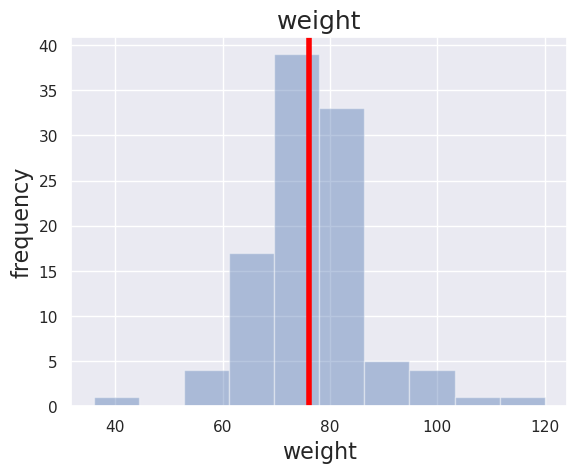

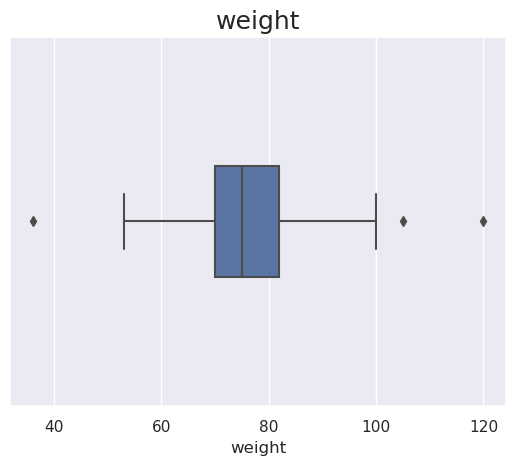

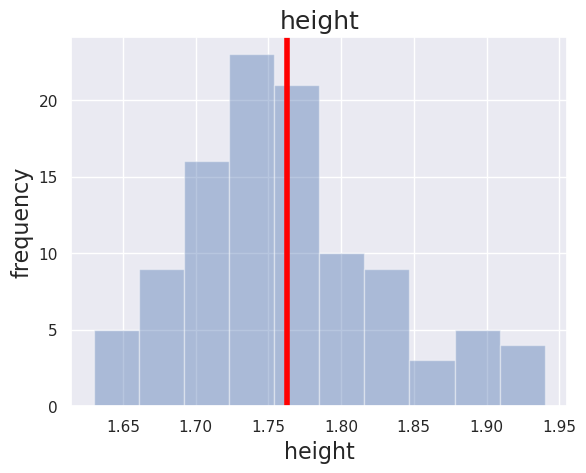

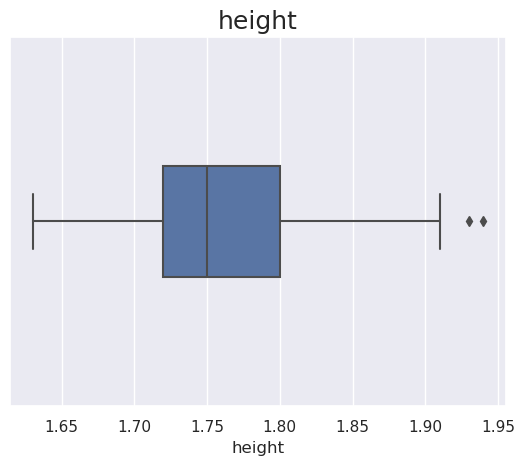

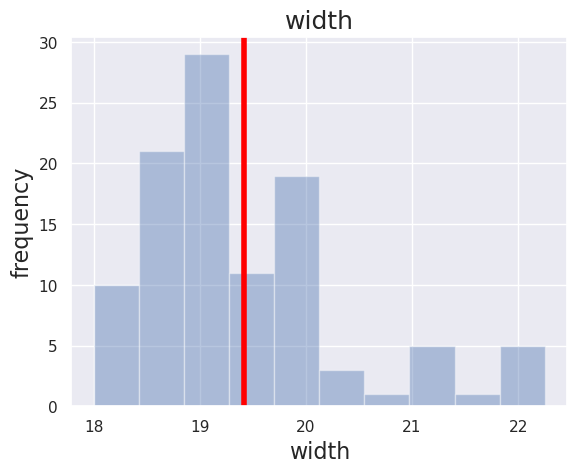

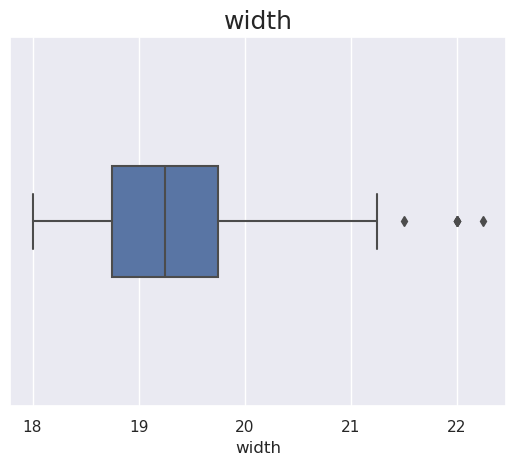

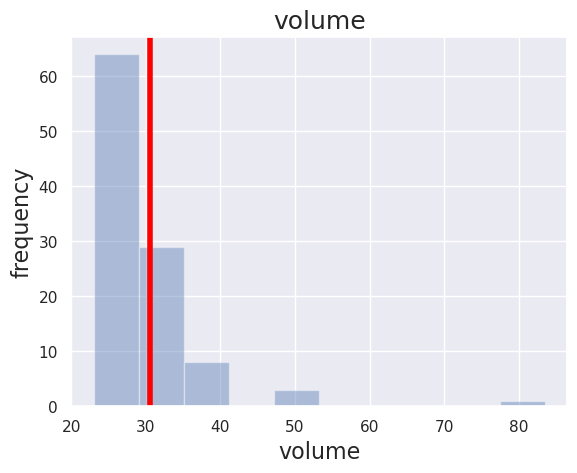

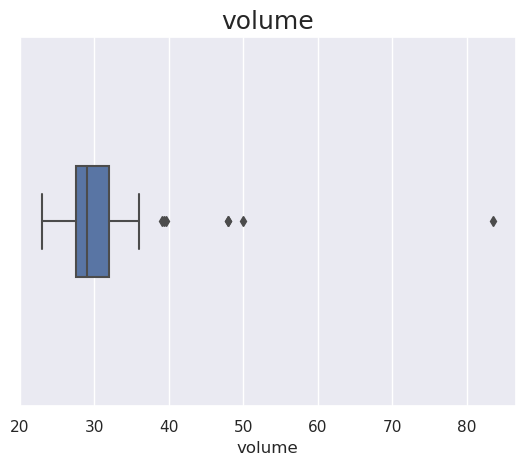

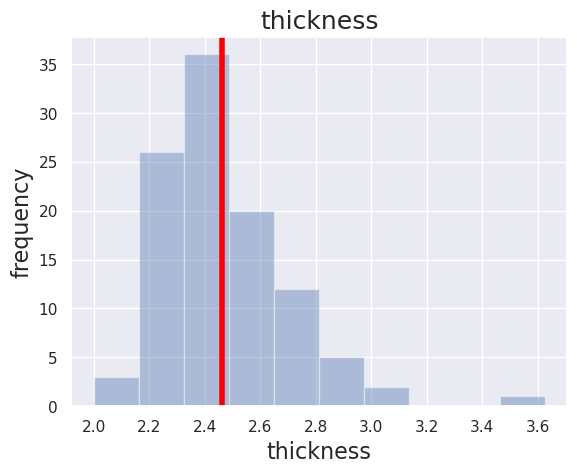

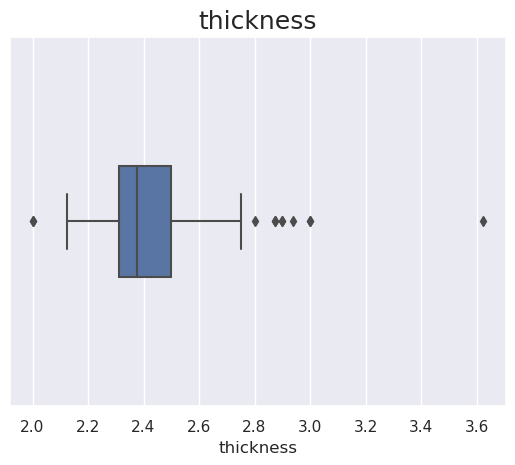

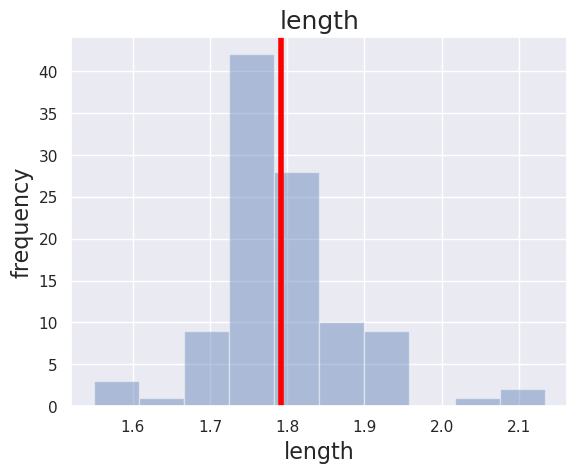

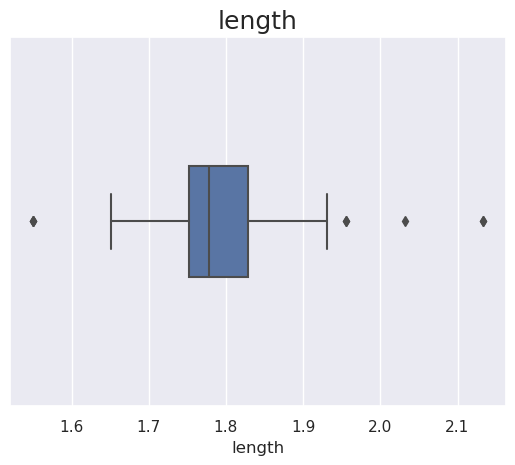

In [31]:
################################################
for i in range(len(quan_cols)):
    hist_plot(quan_cols[i], final_data)
    boxplot(quan_cols[i], final_data)

From the plots above, we can see that there are extreme outliers for volume and thickness that are well outside the range we would expect. The rows for these values will be dropped so as not to skew that data


In [32]:
final_data = final_data.drop([final_data.volume.idxmax(), final_data.thickness.idxmax()])

In [33]:
final_data.reset_index(drop=True, inplace=True)

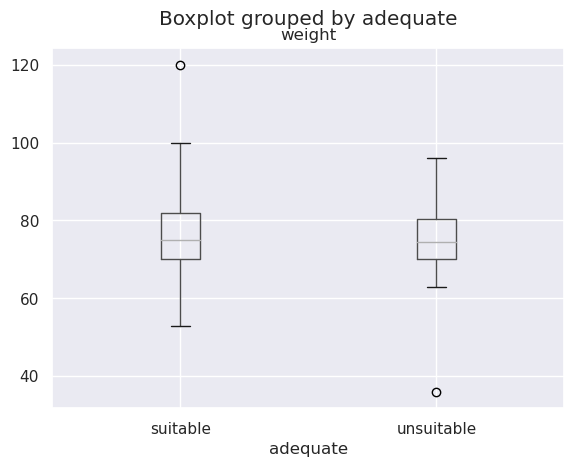

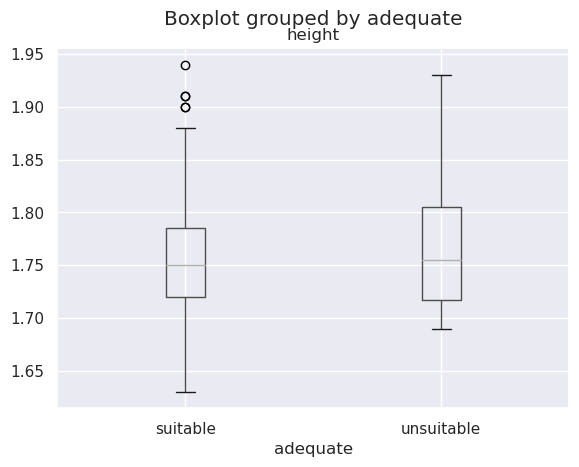

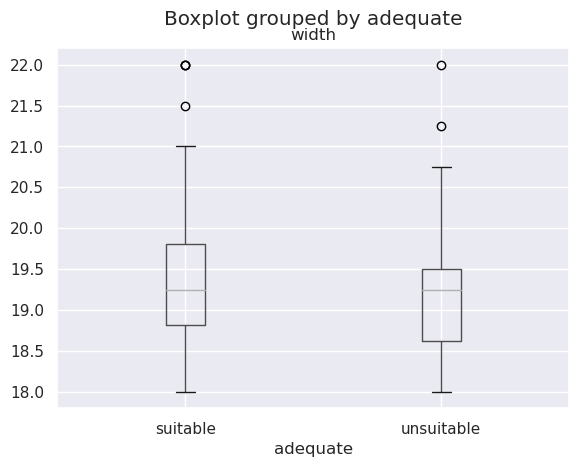

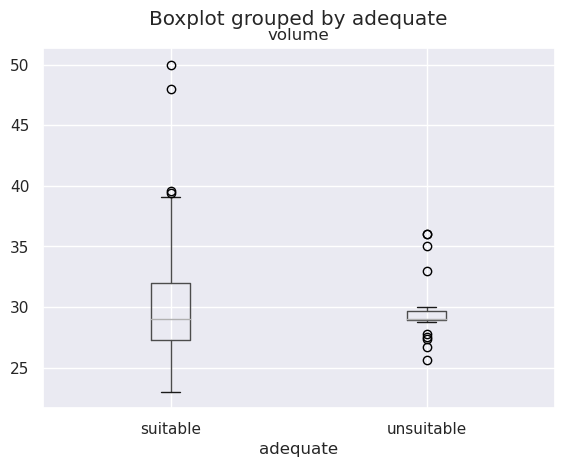

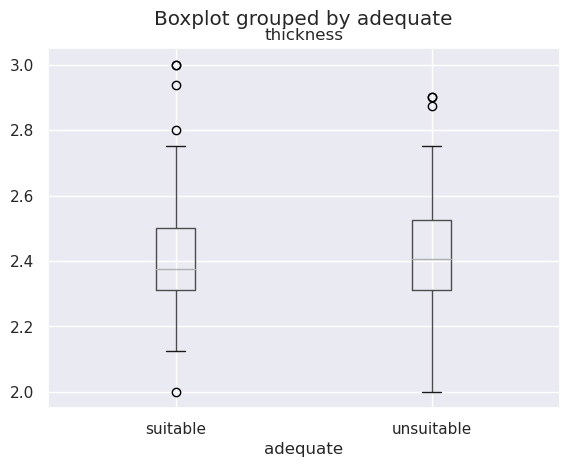

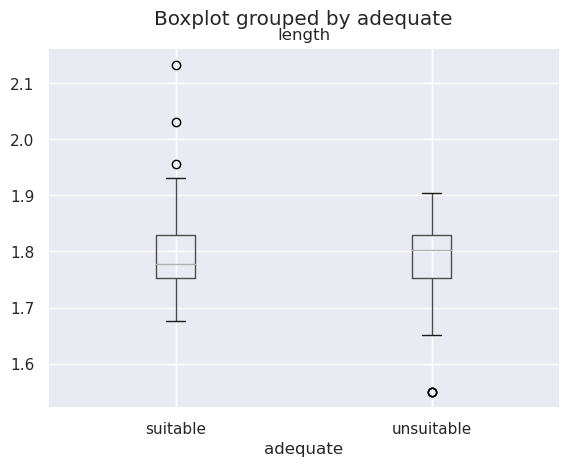

In [34]:
######################################
for col in final_data.columns:
    
    if col in quan_cols:
        final_data.boxplot(column = col, by = 'adequate')
    

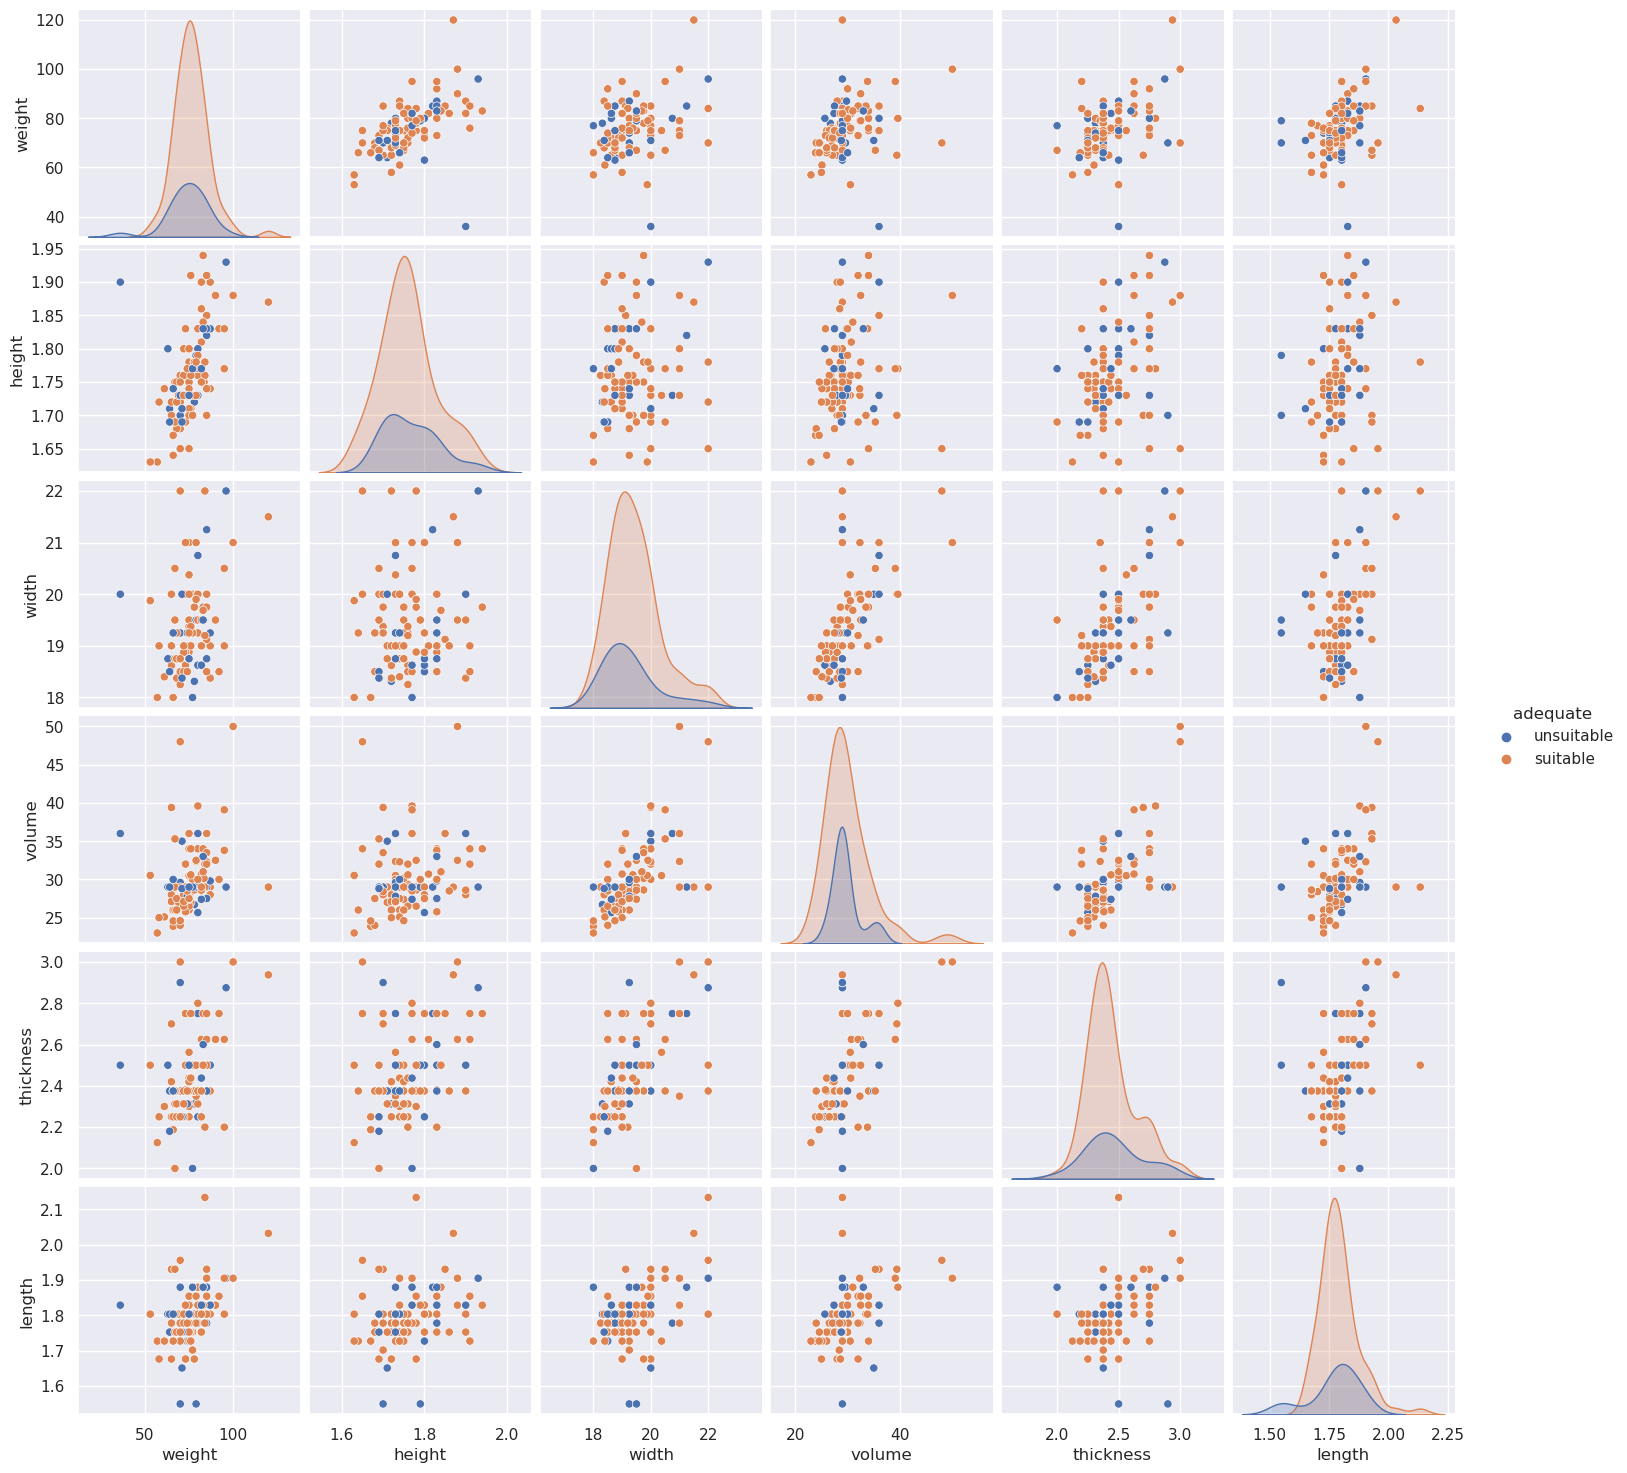

In [35]:
sns.pairplot(final_data, hue='adequate', diag_kind='kde')

In [36]:
final_data.corr(numeric_only=True)

,weight,height,width,volume,thickness,length
weight,1.000000,0.524026,0.308351,0.260055,0.396351,0.381950
height,0.524026,1.000000,0.133945,0.193982,0.297101,0.262535
width,0.308351,0.133945,1.000000,0.559780,0.593795,0.417768
volume,0.260055,0.193982,0.559780,1.000000,0.619108,0.425422
thickness,0.396351,0.297101,0.593795,0.619108,1.000000,0.303700
length,0.381950,0.262535,0.417768,0.425422,0.303700,1.000000


From the correlation matrix and paiplot above, we can see that there is high collinearity amongst the different features of this dataset. In particular, we can see that height and weight is highly correlated which makes sense as taller people generally weigh more. Since weight is more highly correlated to the other board specific features, weight will be dropped from the model and height will be included.

In [37]:
final_data = final_data.drop(columns = 'weight')

From the correlation matrix and pairplot, we can also see that the board attributes are also highly correlated. Since volume is a function of these other terms, that feature will be dropped. (the original idea was to keep it because it is important for buoyancy and boards can have weird shapes so its not merely a function of the other features but it is correlated enough that it will have to be dropped.)

In [38]:
final_data = final_data.drop(columns = 'volume')

nose shape will be converted into numerical dummy value to be used by regression models.

In [39]:
final_data = pd.get_dummies(final_data, columns=['nose_shape'])

In [40]:
final_data.columns

Index(['adequate', 'speed', 'stability', 'maneuverability', 'bouyancy',
       'control', 'height', 'width', 'thickness', 'length',
       'nose_shape_Pointed', 'nose_shape_Round', 'nose_shape_Rounded_pointed'],
      dtype='object')

In [41]:
qual_cols.remove('nose_shape')
quan_cols.append('nose_shape_Pointed')
quan_cols.append('nose_shape_Round')
quan_cols.append('nose_shape_Rounded_pointed')

In [42]:
quan_cols.remove('weight')
quan_cols.remove('volume')

<br>
<br>
<br>


## Models

As stated in the introduction, the first part of this modelling will be to determine which of the performance attributes are most indicative of whether a board is considered adequate or inadequate. In order to do this, categoricals will  be converted into numericals so that logistic regression can be performed. This method will allow us to gain insight into which variables have the most effect on the determined adequacy of the board.

The second part of this modelling will be to determine which board attributes have the most influence on the most influential performance measure (as determined in part 1). This will also be done by performing logistic regression (this time with the performance metric as the response and the quantitative variables as the predictors). In order to do that, the performance metric will have to be collapsed into the equivalent of good and bad before modelling. The quantitative data will also be normalized in order to offset some of the collinearity effects. Depending on the distribution of the performance metric determined in part 1, SMOTE may be performed in order to address class imbalance.

The following functions will create a Logistic Regression model as well as plot the confusiong matrix and ROC curve of a model. The logit function will augment the data using the SMOTE technique in order to minimize the effects of class imbalance which are significant in the data. The logit function will iterate through the SMOTE function to find the k hyperparameter value that results in the highest model accuracy. That model is then used to plot the confusion matrix and ROC curve. 

ROC and AUC was used alongside accuracy, as our data has significant class imbalance.


In [43]:
def conf_mat(metric, y_test, y_pred):
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(metric)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    


In [44]:
def plot_roc(Y_test, Y_prob):
    
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
def logit(X, Y, perf_metric):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    
    tf = True
    count = 1
    acc = 0
    
    while tf:
        
        smote = SMOTE(sampling_strategy='auto', k_neighbors=count, random_state=42)
        X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)
        
        model = LogisticRegression(max_iter=1000).fit(X_resampled, Y_resampled);
        Y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(Y_test, Y_pred)
        
        if accuracy > acc:
            acc = accuracy
        else:
            print(f'k_SMOTE = {count}')
            print(f'model_accuracy = {acc}')
            tf = False
            
        count +=1
        
    
    conf_mat(perf_metric, Y_test, Y_pred)
    
    
    Y_prob = model.predict_proba(X_test)[:,1]
    plot_roc(Y_test, Y_prob)
    
    
    coefs = model.coef_[0]

    # Associate coefficients with the corresponding feature names
    feature_importance = pd.DataFrame({'Attribute': X.columns, 'Coefficient': coefs})

    # Absolute value of coefficients for ranking importance
    feature_importance['Absolute_Coefficient'] = np.abs(coefs)
    feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

    print(feature_importance)
    print('\n','\n','\n','\n')

<br>
<br>
<br>


## Results and Analysis

### Part 1:

convert categorical performance metrics into numerical. Can number these as there is an implied hierarchy to the values.

In [46]:
p1_data = final_data[qual_cols]

In [47]:
conv_dict = {'Average':1, 'Good':2, 'Excellent':3, 'suitable':1, 'unsuitable':0}

In [48]:
for i in p1_data.columns:
    
    p1_data[i] = p1_data[i].replace(conv_dict);

/tmp/ipykernel_244/3849282960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data[i] = p1_data[i].replace(conv_dict);


**Logistic Regression with SMOTE**

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
X = p1_data.drop('adequate', axis=1)
Y = p1_data['adequate']

k_SMOTE = 2
model_accuracy = 0.5588235294117647


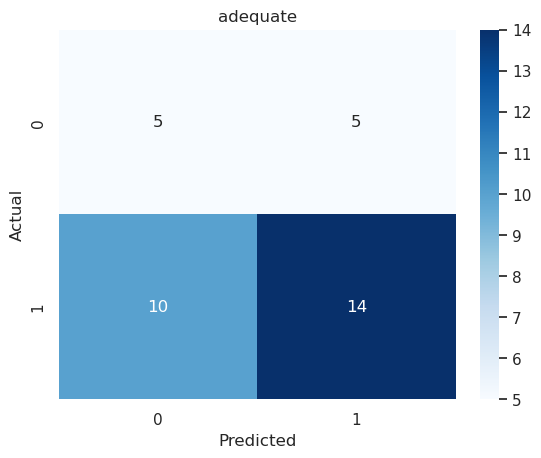

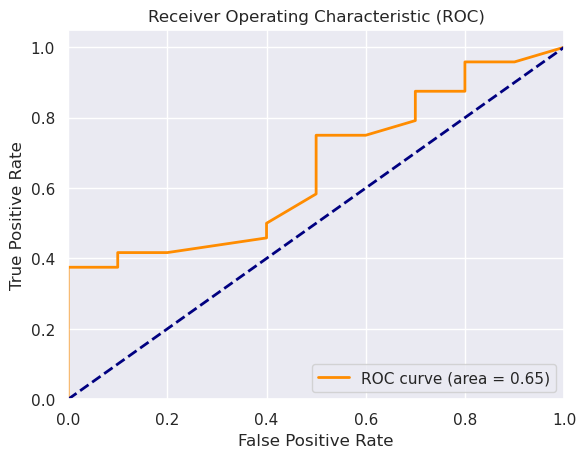

         Attribute  Coefficient  Absolute_Coefficient
4          control     1.017416              1.017416
2  maneuverability     0.931212              0.931212
0            speed    -0.716465              0.716465
3         bouyancy     0.358310              0.358310
1        stability     0.241840              0.241840

 
 
 



In [51]:
logit(X, Y, 'adequate')

<br>
<br>
<br>

**Logistic Regression without SMOTE** 

In [53]:

model = LogisticRegression(max_iter=1000).fit(X_train, y_train);
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'model accuracy = {accuracy}')



NameError: name 'X_train' is not defined

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
coefs = model.coef_[0]

# Associate coefficients with the corresponding feature names
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefs})

# Absolute value of coefficients for ranking importance
feature_importance['Absolute_Coefficient'] = np.abs(coefs)
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance)

<br>
<br>
    
Logistic Regression was performed twice. Once using just our data, and once using data augmented with the SMOTE technique to address class imbalance from our data containing ~4 times as many suitable entries (in the adequate response column) as unsuitable. The R squared value for the model including the SMOTE data was ~.1 less than for the original data model, although the order of predicted significance of features was the same for both models. The positive precision was higher in the SMOTE model than the original indicating that it performed better at not overpredicting positive occurances. The positive recall though was higher for the original (no false negatives) than for the SMOTE model. The SMOTE model outperformed the original data model in both negative precision and negative recall. This means that the SMOTE model was more proficient at predicting negative (unsuitable) observations. These metrics make sense and reinforce the impact of class imbalance becuase the model using our original data essentially worked by overpredicting positive cases as a result of there being significantly more positive instances. The higher accuracy of the original data model is likely due to the class imbalance in the test set, so any model that predicts more positive cases would benefit from that imbalance. If we were interested in prediction rather than inference, the SMOTE model would give us a more accurate prediction model because it proves better at predicting negative instances.

Although the accuracy of the SMOTE model is significantly less than that of our original data model, it is less affected by the class imbalance and so we will be using the coefficient inferences from it to determine which performance metrics are most impactful on the adequacy of a board. The ROC curve shows that our model isn't much better than random chance, but it does show that the model captures some aspect of the patterns wihin the data in that it has an AUC above .5. Methods to improve this are addressed below. The most significant performance metric from that model was found to be **maneuverability** followed by control, bouyancy and then speed, with stability seeming to have a neglibeable affect on the stated adequacy of the board. 

In order to improve this model, first and foremost, more data would diminish the effects of class imbalance and likely result in a more accurate model as well as more accurate testing capabilities. As it is, our testing pool is relatively small so determining the actual accuracy of our model is hard to countenance. Further analysis would also include significant testing of our coefficients to determine which performance metrics actually have a bearing on the adequacy of the board. For our purposes, we are less interested in using this model for prediction, so since the most important feature agrees across both models, this would add little to our analysis. More data points could potentially result in different coefficients and higher significance which would provide us with more confidence that our ordering of feature importance was correct.

<br>
<br>
<br>

### Part 2

In [54]:
maneuv = final_data['maneuverability']

In [55]:
maneuv.value_counts()

Excellent    37
Good         35
Average      31
Name: maneuverability, dtype: int64

In order to perform logistic regression, response variables have to be converted to binary. Excellent will be considered 1 and Average and Good will be combined into 0. Although Good is also technically positive, limiting the positive case to Excellent will allow the model to capture which instances were measured as significantly better. This will somewhat skew the model to measure which attributes of the data resulted in significantly better performance metrics. This is a sort of bias but one which will hopefully allow us to determine which attributes most significantly influence the performance metric.

In [56]:
conv_dict = {'Average':0, 'Good':0, 'Excellent':1}
maneuv = maneuv.replace(conv_dict)

Because there is some collinearity amongst the quant values in our data, the values will be normalized using sklearns MinMaxScalar


In [57]:
quants = final_data[quan_cols]

In [58]:
scaler = MinMaxScaler()
quan_norm = pd.DataFrame(scaler.fit_transform(quants), columns = quants.columns)

<br>

The following cycles through each performance metric and creates a model to determine the significance of each board attribute towards the reported excellence of that metric. 

k_SMOTE = 2
model_accuracy = 0.47058823529411764


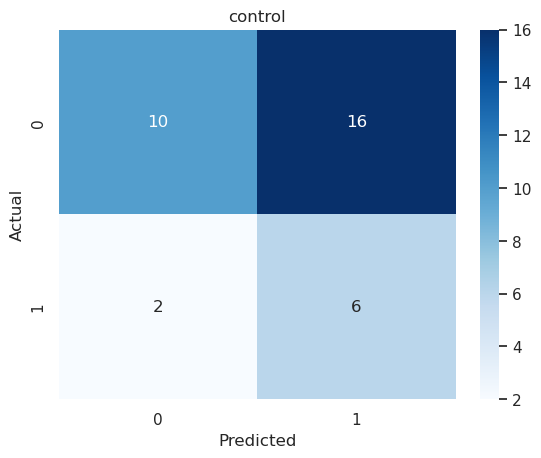

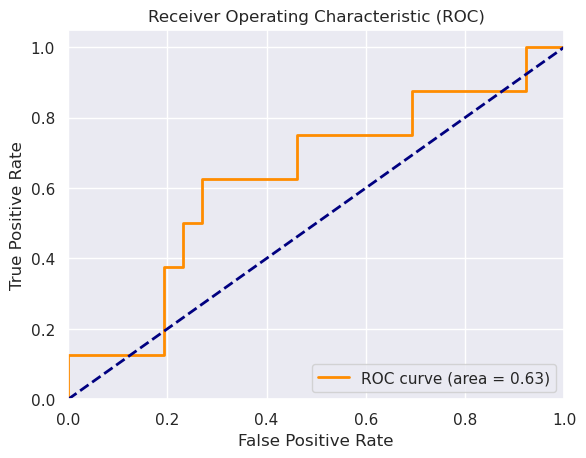

                    Attribute  Coefficient  Absolute_Coefficient
0                      height     0.957368              0.957368
1                       width    -0.926935              0.926935
3                      length    -0.828499              0.828499
4          nose_shape_Pointed     0.597536              0.597536
6  nose_shape_Rounded_pointed    -0.597291              0.597291
2                   thickness    -0.432880              0.432880
5            nose_shape_Round     0.000000              0.000000

 
 
 



In [59]:
logit(quan_norm, maneuv, i)

From the results of the modeling above, we can see that height has a significant influence on maneuverability. Since we are interested in the attributes of the board and since this model tells us little about the interaction between features, height will be dropped to tailor the model to only measure the significance and affect of board attributes rather than rider influence.

In [60]:
quan_norm = quan_norm.drop('height', axis=1)

k_SMOTE = 2
model_accuracy = 0.5882352941176471


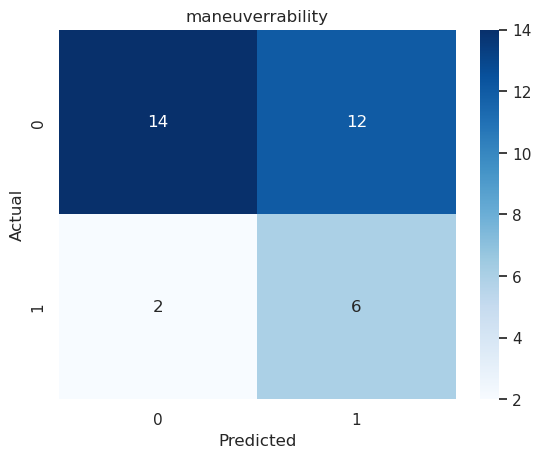

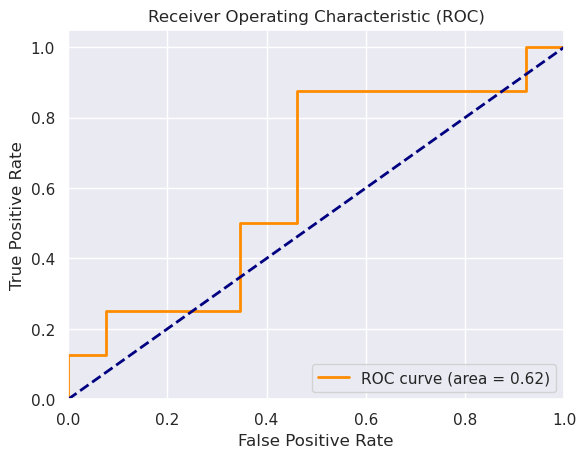

                    Attribute  Coefficient  Absolute_Coefficient
0                       width    -0.828689              0.828689
2                      length    -0.799694              0.799694
5  nose_shape_Rounded_pointed    -0.590571              0.590571
3          nose_shape_Pointed     0.590520              0.590520
1                   thickness    -0.373259              0.373259
4            nose_shape_Round     0.000000              0.000000

 
 
 



In [61]:
logit(quan_norm, maneuv, 'maneuverrability')

From the ROC curves, accuracy measure and Confusion matrices above, we can see that this model isn't a very accurate representation of the data. To improve this, we will perform reverse stepwise refinement to try and determine which features are most influential to maneuverability. 



In [62]:
cols = []
for i in quan_norm.columns:
    cols.append(i)

In [63]:
quan_norm1 = quan_norm.drop('thickness', axis = 1)

k_SMOTE = 3
model_accuracy = 0.6176470588235294


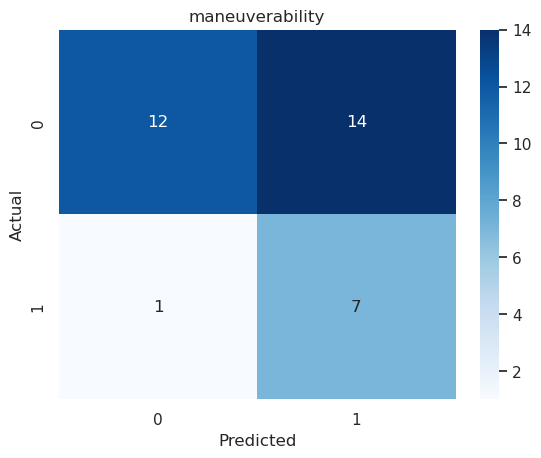

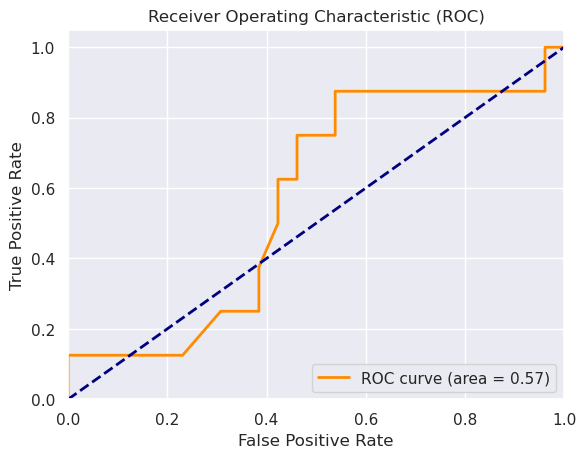

                    Attribute  Coefficient  Absolute_Coefficient
0                       width    -0.855391              0.855391
1                      length    -0.510650              0.510650
4  nose_shape_Rounded_pointed    -0.455832              0.455832
2          nose_shape_Pointed     0.455826              0.455826
3            nose_shape_Round     0.000000              0.000000

 
 
 



In [64]:
logit(quan_norm1, maneuv, 'maneuverability')

k_SMOTE = 3
model_accuracy = 0.6176470588235294


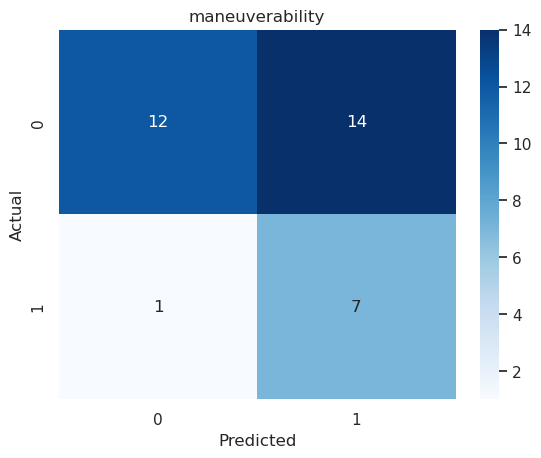

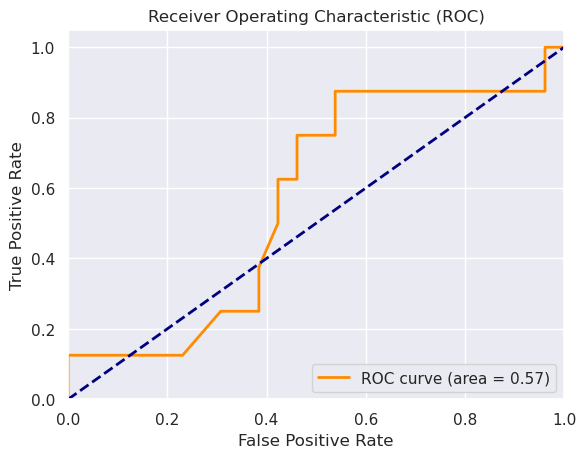

                    Attribute  Coefficient  Absolute_Coefficient
0                       width    -0.855391              0.855391
1                      length    -0.510650              0.510650
3  nose_shape_Rounded_pointed    -0.455832              0.455832
2          nose_shape_Pointed     0.455826              0.455826

 
 
 



In [65]:
quan_norm2 = quan_norm1.drop('nose_shape_Round', axis = 1)
logit(quan_norm2, maneuv, 'maneuverability')

k_SMOTE = 2
model_accuracy = 0.5294117647058824


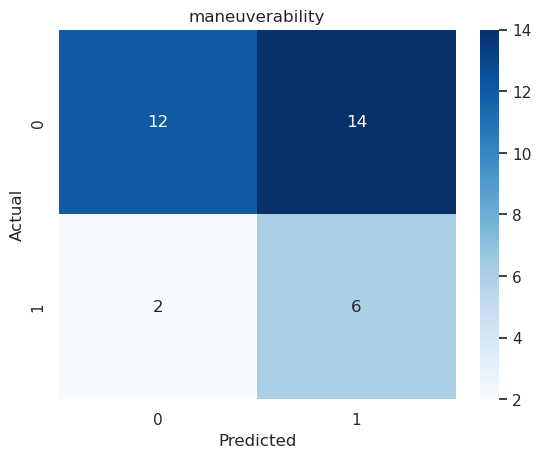

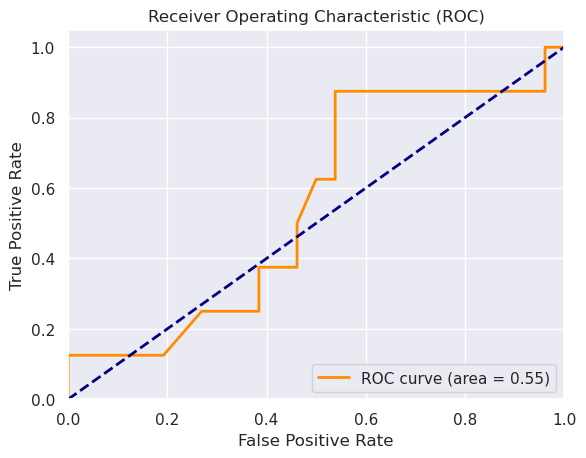

                    Attribute  Coefficient  Absolute_Coefficient
2  nose_shape_Rounded_pointed    -0.965176              0.965176
0                       width    -0.938187              0.938187
1                      length    -0.852918              0.852918

 
 
 



In [66]:
quan_norm3 = quan_norm2.drop('nose_shape_Pointed', axis = 1)
logit(quan_norm3, maneuv, 'maneuverability')

We can see from the iterations above, that the best we can get our model to perform by tailoring features is an ROC of .57 and an accuracy of 0.62. This indicates that the features included in this analysis are likely not indicative of the maneuverability of a board. This could also possibly be due to the small sample size included in the data, especially when the class imbalance is taken into account. This was attempted to be offset using SMOTE for our training data, but it still left our testing data with a significant class imbalance where the negative reports for maneuverability far outwieghed the positive reports. This means that while our training data was augmented to offset some of this, the model overpredicted positive values that weren't seen in the testing data (False Positives).
From the coefficients we did obtain, our model tells us that all of the coefficients have a negative relationship with maneuverability indicating that decreasing these board attributes results in the better maneuverability. This is in line with what we would exect, as a larger board would have more weight and surface area in contact with the water resulting in increased resistance. Maneuverability could be defined by minimal resistance so that smaller inputs to the board result in more overall movements. We can also see in our model that the nose shape had relatively little influence on maneuverability. Each of the one hot encoded columns included in the model had the same coefficients indicating that all the categories for nose shape had a similar effect (id. minimal) effect on maneuverability.
Our reverse stepwise refinemenet also finished with removing one of the remaining two one-hot encoded features, which lost all the data from the one-hot encoding and changed the nose_shape variable into a meaningless measurement which drastically reduced the predictive power of that model. 

<br>
<br>
<br>

## Discussion and Conclusion

Overall, the models created for this project did a poor job of representing the data. The final structure of our data contained imbalanced classes for every category, so the predictions of the models were heavily skewed. I attempted to offset this using the SMOTE technique, but that didn't account for the fact that SMOTE should only be used to augment training data and so our testing data was heavily imbalanced. This meant that the SMOTE augmented training data led to a model that overpredicted the underrepresented class when used on the testing data. This showed the limitations of SMOTE because class imbalance can still be a large factor in the testing data. Another factor that probably limited the effectiveness of the model is the relative simplicity of the gathered data. I have recently started a project company where we design surfboards, and so I've realized the complexity of the design beyond things like length and width in determining how a board rides. There are several factors that go into the design that weren't captured by this survey data that undoubtadly have a significant effect on the overall adequacy of a board as well as its various performance metrics. 

Although the accuracy of our models wasn't high, the results we did obtain seem to match what we would expect. Maneuverability of a board is a large aspect of how a board feels and more maneuverability allows the rider to have to work less to get the board to do what they want. In comparison to the other performance metrics, maneuverability seems to be a likely candidate for the most important. Control and speed would also seem to be likely candidates, but the results we obtained are reasonable even if the accuracy of the model is low. We also obtained a negative relationship in part two between the board attributes and maneuverability. This is also in line with what we would exect, as smaller boards (low length and width) experience less resistance from the water and have a smaller moment of intertia allowing for easier turns and more responsive movements. When performing stepwise refinement on the model, the first attribute that was removed was thickness which matches what we described affecting maneuverability before. Thickness doesn't contribute (much) to how much of the board would be in contact with the water, and so the fact that our model picked up that it might have little to do with maneuverability conforms to what we might think before running the model.

Overall, this project is what I was hoping to get out of this class (even in the face of the poor outcome). Taking something from raw data to trying to tease out the patterns in it really helped solidify a lot of the topics we learned throughout the class. I think the biggest takeaway I got from this project was realizing how important the original data is in all of this. That seems like a simple and obvious takeaway, but working through it made me realize how the choice of features and the sparsness or structure of the data affect what you can get out of it. Cleaning the data removed a significant portion, so the resulting amount of data I had was much smaller than I thought and proabably too small to capture the relationships among so many different features. 

I also realized the limitations of certain methods and the significance of choosing which model you are going to use. I had a classification problem from the start, but I was interested in inference, and so the only option I really felt prepared to work with was Logistic Regression. In order to use this, I had to change the data a lot which I think introduced a lot of variance and hurt the overall usefullness of the data. In the end, most of the metrics I obtained seemed far off from the good values we always saw in class problems, and so it led me to be a bit unsure where the boundaries of acceptance are. I'm pretty sure that I can't actually take much from my model, but is an accuracy of .6 enough to infer the significance of the biggest coefficient and thus accept that that feature was the most important performance metric for the percieved adequacy of a board? Does the fact that the model, even with a low accuracy, conforms to what we might predict just from thinking about the variables and what we know about surfing indicate that we can take it seriously and tentatively use the predictions it makes in making decisions about board design? I don't exactly know , but after this project, I fell much more confident in understanding just what a set of data can get you and how to go about learning what you can from it.